In [2]:
import gensim
import pandas as pd
import numpy as np
import re

ImportError: cannot import name 'entropy'

In [3]:
embedding_path = 'D:/迅雷下载/wikipedia-pubmed-and-PMC-w2v.bin'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(embedding_path,binary=True)

In [4]:
print('Found %s word vectors of word2vec' % len(word2vec.vocab))

Found 5443656 word vectors of word2vec


In [6]:
len(word2vec['heart'])

200

In [7]:
word2vec['angap']

KeyError: "word 'angap' not in vocabulary"

In [9]:
file_name = 'C:/Users/wangkc/Desktop/胡喜风预测论文/text_flag_20200912.csv'
data = pd.read_csv(file_name)

In [10]:
text = data[['hadm_id', 'text']].values
text[0, 0]
print(text)

[[121936
  'Admission Date:  [**2125-2-9**]              Discharge Date:   [**2125-2-16**]\n\n\nService: MEDICINE\n\nAllergies:\nZocor / Lescol\n\nAttending:[**Doctor Last Name 1857**]\nChief Complaint:\nChest pain\n\nMajor Surgical or Invasive Procedure:\nCentral venous line insertion (right internal jugular vein)\n\nHistory of Present Illness:\nMr. [**Known lastname 1858**] is an 84 yo man with moderate aortic stenosis (outside\nhospital echo in [**2124**] with [**Location (un) 109**] 1 cm2, gradient 28 mmHg, moderate\nmitral regurgitation, mild aortic insufficiency), chronic left\nventricular systolic heart failure with EF 25-30%, hypertension,\nhyperlipidemia, diabetes mellitus, CAD s/p CABG in [**2099**] with\nSVG-LAD-Diagonal, SVG-OM, and SVG-RPDA-RPL, with a re-do CABG in\n[**9-/2117**] with LIMA-LAD, SVG-OM, SVG-diagonal, and SVG-RCA. He also\nhas severe peripheral arterial disease s/p peripheral bypass\nsurgery. He presented to [**Hospital 1474**] Hospital ER this morning with

In [11]:
res_list = []
for hadm_id, item in text:
    new_text = re.sub('\[[^\[\]]*\]', ' ', item)
    new_text = re.sub('[#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”！[\\]^_`{|}~\s]+', " ", new_text)
    new_text = new_text.replace('\r\n', ' ').replace('\n', ' ').replace('\r', ' ').split(' ')
    new_text = list(filter(None, new_text))
    res_list.append([hadm_id, new_text])
len(res_list)

5298

In [13]:
vocab_data = []
for item in text: 
    res = np.zeros(200)
    num = 0
    none_num = 0
    for word in item[1]:
        if word in word2vec.wv.vocab:
            res += word2vec[word]
            num += 1
        elif word.lower() in word2vec.wv.vocab:
            print('lower: ', item[0], word)
            res += word2vec[word.lower()]
            num += 1
        elif word.upper() in word2vec.wv.vocab:
            print('upper: ', item[0], word)
            res += word2vec[word.upper()]
            num += 1
        else:
#             print(item[0], word)
            none_num += 1
    print('总数', item[0], num)
    print('None总数', item[0], none_num)
    vocab_data.append(np.append(item[0], res / num))
vocab_data = np.array(vocab_data)

<ipython-input-13-a6f95c0aa234>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if word in word2vec.wv.vocab:
<ipython-input-13-a6f95c0aa234>:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  elif word.lower() in word2vec.wv.vocab:
<ipython-input-13-a6f95c0aa234>:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  elif word.upper() in word2vec.wv.vocab:


总数 121936 11858
None总数 121936 2212
总数 146533 9128
None总数 146533 1886
总数 112385 4643
None总数 112385 1006
总数 129387 9479
None总数 129387 1815
总数 139542 5210
None总数 139542 1062
总数 154895 4750
None总数 154895 1017
总数 139852 7704
None总数 139852 1528
总数 116703 4179
None总数 116703 781
总数 118185 7367
None总数 118185 1498
总数 133757 12496
None总数 133757 2197
总数 100195 7142
None总数 100195 1533
总数 155786 8737
None总数 155786 1709
总数 193743 10136
None总数 193743 1956
总数 183457 7773
None总数 183457 1625
总数 137954 7173
None总数 137954 1392
总数 116578 7309
None总数 116578 1302
总数 181620 5451
None总数 181620 1081
总数 180500 6705
None总数 180500 1416
总数 153824 14011
None总数 153824 2679
总数 146305 6612
None总数 146305 1356
总数 180080 5239
None总数 180080 1061
总数 102898 3662
None总数 102898 683
总数 114814 9998
None总数 114814 2203
总数 102677 18100
None总数 102677 3563
总数 154662 6435
None总数 154662 1266
总数 167487 8508
None总数 167487 1695
总数 184484 7880
None总数 184484 1609
总数 154972 11030
None总数 154972 2073
总数 148828 5763
None总数 148828 1083
总数 110031 

None总数 189128 1532
总数 188895 3286
None总数 188895 668
总数 172993 4173
None总数 172993 885
总数 182995 15943
None总数 182995 3113
总数 125953 10789
None总数 125953 2077
总数 171755 3228
None总数 171755 692
总数 123519 4687
None总数 123519 1001
总数 152865 8846
None总数 152865 1572
总数 141508 5108
None总数 141508 1095
总数 122379 15821
None总数 122379 3183
总数 168844 2254
None总数 168844 511
总数 175168 3350
None总数 175168 665
总数 111674 17907
None总数 111674 3197
总数 111496 12364
None总数 111496 2411
总数 120345 3625
None总数 120345 713
总数 152504 10320
None总数 152504 2017
总数 175360 3644
None总数 175360 735
总数 173989 2827
None总数 173989 639
总数 184378 3599
None总数 184378 732
总数 189004 9703
None总数 189004 1891
总数 199912 4468
None总数 199912 862
总数 160393 12313
None总数 160393 2387
总数 138645 15550
None总数 138645 2910
总数 171653 5593
None总数 171653 1177
总数 121892 9665
None总数 121892 1892
总数 185024 10718
None总数 185024 2045
总数 156287 3936
None总数 156287 865
总数 192165 13523
None总数 192165 2477
总数 162598 5321
None总数 162598 979
总数 165488 13901
None总数 165488 2

总数 192121 18753
None总数 192121 3716
总数 132060 6367
None总数 132060 1377
总数 154259 10360
None总数 154259 2006
总数 116595 7844
None总数 116595 1631
总数 143200 10074
None总数 143200 1948
总数 101309 9421
None总数 101309 1817
总数 121296 13137
None总数 121296 2494
总数 140160 4114
None总数 140160 815
总数 145688 13506
None总数 145688 2682
总数 101078 2947
None总数 101078 614
总数 180816 10185
None总数 180816 1919
总数 101961 8952
None总数 101961 1823
总数 110393 5989
None总数 110393 1230
总数 186974 8557
None总数 186974 1734
总数 111542 17552
None总数 111542 3326
总数 125222 11593
None总数 125222 1927
总数 189909 7467
None总数 189909 1490
总数 199176 7169
None总数 199176 1261
总数 187668 18095
None总数 187668 3338
总数 100883 7693
None总数 100883 1584
总数 182383 11039
None总数 182383 2054
总数 191219 5503
None总数 191219 1087
总数 158842 9050
None总数 158842 1876
总数 133755 9988
None总数 133755 1902
总数 127437 9917
None总数 127437 1926
总数 162713 15425
None总数 162713 2894
总数 178071 2404
None总数 178071 453
总数 149471 11835
None总数 149471 2194
总数 193799 12074
None总数 193799 2176
总数 1

总数 184495 15317
None总数 184495 2990
总数 102163 11911
None总数 102163 2324
总数 137764 15188
None总数 137764 2853
总数 183445 4577
None总数 183445 915
总数 111915 11766
None总数 111915 2259
总数 163476 9122
None总数 163476 1970
总数 174241 7844
None总数 174241 1493
总数 105849 8017
None总数 105849 1416
总数 122023 9518
None总数 122023 2004
总数 103591 7223
None总数 103591 1414
总数 165343 5374
None总数 165343 1145
总数 124909 5325
None总数 124909 1056
总数 129480 2568
None总数 129480 605
总数 182631 8564
None总数 182631 1570
总数 147087 9643
None总数 147087 1828
总数 120369 15847
None总数 120369 3092
总数 190486 9394
None总数 190486 1827
总数 107239 7504
None总数 107239 1493
总数 125643 14439
None总数 125643 2793
总数 141121 5301
None总数 141121 1019
总数 152134 2336
None总数 152134 566
总数 108220 7547
None总数 108220 1402
总数 151195 11225
None总数 151195 2296
总数 185148 9043
None总数 185148 1660
总数 102108 3879
None总数 102108 716
总数 141069 6177
None总数 141069 1160
总数 108465 6796
None总数 108465 1322
总数 143763 8451
None总数 143763 1651
总数 150810 5334
None总数 150810 1094
总数 109309 6

总数 102451 8940
None总数 102451 1992
总数 174504 8403
None总数 174504 1624
总数 149433 9325
None总数 149433 1724
总数 137696 6410
None总数 137696 1178
总数 188670 10925
None总数 188670 2154
总数 139491 3383
None总数 139491 732
总数 175643 8454
None总数 175643 1747
总数 160191 12465
None总数 160191 2609
总数 162645 11441
None总数 162645 2232
总数 179373 18254
None总数 179373 3257
总数 180277 7763
None总数 180277 1468
总数 175044 6885
None总数 175044 1380
总数 106260 22123
None总数 106260 3998
总数 139344 8425
None总数 139344 1553
总数 137132 7865
None总数 137132 1564
总数 137393 8891
None总数 137393 1640
总数 119632 3561
None总数 119632 750
总数 114873 8280
None总数 114873 1605
总数 123720 3584
None总数 123720 739
总数 191740 3568
None总数 191740 801
总数 128232 11230
None总数 128232 2170
总数 191527 7376
None总数 191527 1386
总数 132175 6655
None总数 132175 1313
总数 183762 11760
None总数 183762 2229
总数 144773 12803
None总数 144773 2383
总数 153413 13216
None总数 153413 2664
总数 172548 4897
None总数 172548 896
总数 175139 6287
None总数 175139 1536
总数 188623 30437
None总数 188623 5893
总数 145941

总数 115006 6440
None总数 115006 1308
总数 182441 14146
None总数 182441 3142
总数 165593 11432
None总数 165593 3136
总数 186433 10508
None总数 186433 2062
总数 178493 9827
None总数 178493 1947
总数 164716 7078
None总数 164716 1497
总数 145494 9637
None总数 145494 1989
总数 187956 4974
None总数 187956 1016
总数 138926 3867
None总数 138926 803
总数 144265 4328
None总数 144265 909
总数 106119 3571
None总数 106119 778
总数 181102 5515
None总数 181102 1156
总数 148914 1883
None总数 148914 413
总数 116032 6239
None总数 116032 1185
总数 184282 4099
None总数 184282 812
总数 138367 3944
None总数 138367 858
总数 121643 11778
None总数 121643 2313
总数 164489 3497
None总数 164489 696
总数 179405 9541
None总数 179405 1904
总数 158866 7030
None总数 158866 1426
总数 124987 9123
None总数 124987 1884
总数 118707 7511
None总数 118707 1513
总数 165520 2859
None总数 165520 578
总数 171664 9484
None总数 171664 1820
总数 194370 10834
None总数 194370 2009
总数 161890 5227
None总数 161890 1078
总数 175344 10440
None总数 175344 1975
总数 171930 13257
None总数 171930 2366
总数 131358 4824
None总数 131358 1032
总数 174389 3620


总数 182442 5550
None总数 182442 1113
总数 115411 3915
None总数 115411 790
总数 199383 7577
None总数 199383 1497
总数 107267 7404
None总数 107267 1470
总数 182046 9724
None总数 182046 1897
总数 116805 5979
None总数 116805 1173
总数 124962 3373
None总数 124962 735
总数 142702 5103
None总数 142702 1062
总数 165308 6992
None总数 165308 1430
总数 181266 6252
None总数 181266 1294
总数 189822 8579
None总数 189822 1595
总数 101710 6225
None总数 101710 1234
总数 158544 16661
None总数 158544 3165
总数 142678 8850
None总数 142678 1798
总数 167768 12037
None总数 167768 2134
总数 174954 11569
None总数 174954 2211
总数 142639 14616
None总数 142639 3057
总数 186198 11213
None总数 186198 2237
总数 112676 5294
None总数 112676 954
总数 114375 9802
None总数 114375 2051
总数 138597 4684
None总数 138597 990
总数 125702 6537
None总数 125702 1340
总数 175615 4149
None总数 175615 875
总数 140802 5963
None总数 140802 1202
总数 119647 13354
None总数 119647 2472
总数 152859 5939
None总数 152859 1270
总数 121802 11870
None总数 121802 2473
总数 129833 3209
None总数 129833 728
总数 106868 7335
None总数 106868 1503
总数 138746 590

总数 172699 5344
None总数 172699 1148
总数 151826 7445
None总数 151826 1498
总数 110875 5839
None总数 110875 1200
总数 180199 8770
None总数 180199 1633
总数 181470 9874
None总数 181470 1911
总数 101964 4070
None总数 101964 865
总数 196267 6304
None总数 196267 1249
总数 106157 6160
None总数 106157 1349
总数 157935 4617
None总数 157935 950
总数 110222 5794
None总数 110222 1138
总数 166254 17137
None总数 166254 3353
总数 111527 3400
None总数 111527 732
总数 161410 10311
None总数 161410 2170
总数 120442 12424
None总数 120442 2348
总数 152722 5407
None总数 152722 1110
总数 132943 3532
None总数 132943 767
总数 124585 6964
None总数 124585 1350
总数 101883 5182
None总数 101883 1100
总数 130140 5700
None总数 130140 1139
总数 105889 9596
None总数 105889 1912
总数 138061 8755
None总数 138061 1749
总数 104756 7169
None总数 104756 1495
总数 199050 3927
None总数 199050 842
总数 170413 6754
None总数 170413 1310
总数 138728 7108
None总数 138728 1387
总数 133936 8549
None总数 133936 1776
总数 116251 11161
None总数 116251 2285
总数 180053 8400
None总数 180053 1690
总数 120078 8573
None总数 120078 1568
总数 107281 15714

总数 193236 6441
None总数 193236 1235
总数 134658 5181
None总数 134658 1050
总数 148461 10566
None总数 148461 2071
总数 187280 7250
None总数 187280 1547
总数 100656 7336
None总数 100656 1513
总数 140133 5378
None总数 140133 1099
总数 150372 3110
None总数 150372 652
总数 158239 5966
None总数 158239 1236
总数 136958 2619
None总数 136958 543
总数 177144 10139
None总数 177144 2066
总数 133544 3787
None总数 133544 821
总数 141630 5576
None总数 141630 1191
总数 164967 7948
None总数 164967 1583
总数 169498 9852
None总数 169498 2069
总数 199537 2197
None总数 199537 517
总数 152099 5426
None总数 152099 1144
总数 177514 4623
None总数 177514 982
总数 189942 4089
None总数 189942 871
总数 142297 3047
None总数 142297 680
总数 119073 9151
None总数 119073 1672
总数 178948 7604
None总数 178948 1521
总数 123262 9454
None总数 123262 1814
总数 186457 10962
None总数 186457 2157
总数 132950 9881
None总数 132950 2000
总数 118338 10177
None总数 118338 1986
总数 192107 12511
None总数 192107 2311
总数 184027 6793
None总数 184027 1239
总数 168108 5224
None总数 168108 1008
总数 129294 12989
None总数 129294 2691
总数 182515 7806


总数 132285 8843
None总数 132285 1684
总数 132008 10692
None总数 132008 2147
总数 123316 5750
None总数 123316 1194
总数 171685 13475
None总数 171685 2371
总数 168634 14666
None总数 168634 2812
总数 115895 7429
None总数 115895 1339
总数 112084 8714
None总数 112084 1831
总数 158330 5786
None总数 158330 1202
总数 117764 12371
None总数 117764 2648
总数 117332 9200
None总数 117332 1899
总数 140892 6725
None总数 140892 1161
总数 153709 4351
None总数 153709 905
总数 129596 6564
None总数 129596 1385
总数 139362 5071
None总数 139362 1014
总数 108934 3920
None总数 108934 804
总数 185101 5591
None总数 185101 1176
总数 121853 7465
None总数 121853 1502
总数 148586 4397
None总数 148586 907
总数 161852 6539
None总数 161852 1286
总数 199513 6209
None总数 199513 1214
总数 109308 2768
None总数 109308 574
总数 189600 5193
None总数 189600 1079
总数 127824 6730
None总数 127824 1384
总数 146627 14963
None总数 146627 3050
总数 116777 2258
None总数 116777 509
总数 155234 7309
None总数 155234 1499
总数 110010 13357
None总数 110010 2510
总数 195101 7364
None总数 195101 1425
总数 182846 5245
None总数 182846 1090
总数 156439 360

总数 153051 10210
None总数 153051 1926
总数 138528 10265
None总数 138528 1990
总数 148562 6965
None总数 148562 1449
总数 139835 4094
None总数 139835 867
总数 158555 4570
None总数 158555 876
总数 188382 8466
None总数 188382 1575
总数 147802 5735
None总数 147802 1124
总数 141709 10782
None总数 141709 2052
总数 113091 10898
None总数 113091 1965
总数 109618 6685
None总数 109618 1360
总数 182162 4533
None总数 182162 867
总数 174528 6429
None总数 174528 1313
总数 148206 7893
None总数 148206 1532
总数 177505 2434
None总数 177505 499
总数 194047 6933
None总数 194047 1379
总数 185967 6715
None总数 185967 1399
总数 128949 5692
None总数 128949 1172
总数 197921 5692
None总数 197921 1068
总数 189051 9240
None总数 189051 1773
总数 177817 9460
None总数 177817 1677
总数 188427 4853
None总数 188427 919
总数 173375 7259
None总数 173375 1478
总数 154151 9458
None总数 154151 1928
总数 167595 5953
None总数 167595 1241
总数 191539 6904
None总数 191539 1439
总数 172364 3947
None总数 172364 836
总数 183308 13752
None总数 183308 3022
总数 185351 4378
None总数 185351 909
总数 120657 9803
None总数 120657 1919
总数 145526 5656
N

总数 134829 10479
None总数 134829 2006
总数 100161 7269
None总数 100161 1475
总数 105595 4785
None总数 105595 946
总数 179186 9947
None总数 179186 1980
总数 111969 4979
None总数 111969 912
总数 111870 8404
None总数 111870 1607
总数 100095 6437
None总数 100095 1304
总数 142061 3786
None总数 142061 807
总数 110666 8624
None总数 110666 1584
总数 135807 6874
None总数 135807 1485
总数 142408 13408
None总数 142408 2538
总数 117776 5877
None总数 117776 1161
总数 148987 8168
None总数 148987 1535
总数 171502 8484
None总数 171502 1685
总数 126281 7706
None总数 126281 1646
总数 185265 8974
None总数 185265 1762
总数 153800 10373
None总数 153800 2137
总数 142640 10504
None总数 142640 2065
总数 197728 9836
None总数 197728 1862
总数 194940 6313
None总数 194940 1402
总数 190711 12242
None总数 190711 2388
总数 152772 4452
None总数 152772 965
总数 103498 4183
None总数 103498 909
总数 169147 11927
None总数 169147 2267
总数 174178 6776
None总数 174178 1391
总数 103712 6155
None总数 103712 1296
总数 157277 5984
None总数 157277 1301
总数 102167 1135
None总数 102167 271
总数 163251 7317
None总数 163251 1305
总数 179614 1770

总数 165620 33283
None总数 165620 6258
总数 181374 8600
None总数 181374 1567
总数 133605 6572
None总数 133605 1258
总数 127930 13458
None总数 127930 2527
总数 194358 8694
None总数 194358 1691
总数 145083 8078
None总数 145083 1600
总数 101864 17620
None总数 101864 3240
总数 101194 6430
None总数 101194 1145
总数 116062 8719
None总数 116062 1749
总数 164200 6237
None总数 164200 1235
总数 123258 14599
None总数 123258 2655
总数 111738 9284
None总数 111738 1769
总数 110528 8414
None总数 110528 1575
总数 180916 6368
None总数 180916 1238
总数 192688 7543
None总数 192688 1491
总数 101128 8771
None总数 101128 1756
总数 148154 7591
None总数 148154 1526
总数 199632 12034
None总数 199632 2920
总数 124386 7057
None总数 124386 1419
总数 143292 13762
None总数 143292 2643
总数 198398 9964
None总数 198398 1803
总数 187021 6490
None总数 187021 1255
总数 181960 9236
None总数 181960 1787
总数 176110 9485
None总数 176110 1829
总数 186204 19014
None总数 186204 3999
总数 190738 10891
None总数 190738 2083
总数 100784 8036
None总数 100784 1425
总数 146336 2051
None总数 146336 451
总数 169719 11806
None总数 169719 2185
总数 101

总数 193992 21039
None总数 193992 4193
总数 145761 8614
None总数 145761 1698
总数 128822 17144
None总数 128822 3527
总数 152930 7279
None总数 152930 1451
总数 115322 15525
None总数 115322 3015
总数 180279 8354
None总数 180279 1574
总数 106303 8622
None总数 106303 1545
总数 174453 13632
None总数 174453 2593
总数 169663 8246
None总数 169663 1767
总数 101906 7702
None总数 101906 1788
总数 124023 11161
None总数 124023 2181
总数 122578 10579
None总数 122578 1987
总数 157883 11544
None总数 157883 2198
总数 180551 14378
None总数 180551 2541
总数 176749 11093
None总数 176749 2060
总数 136056 18790
None总数 136056 4002
总数 186403 9378
None总数 186403 1839
总数 132257 6849
None总数 132257 1311
总数 123514 6888
None总数 123514 1403
总数 132489 9728
None总数 132489 1861
总数 148681 8406
None总数 148681 1668
总数 178112 3703
None总数 178112 736
总数 138437 8176
None总数 138437 1498
总数 173336 8221
None总数 173336 1552
总数 127915 6932
None总数 127915 1270
总数 101295 10189
None总数 101295 1725
总数 184497 16923
None总数 184497 3543
总数 150103 8505
None总数 150103 1533
总数 187114 10481
None总数 187114 2022
总数

总数 192196 7132
None总数 192196 1470
总数 171167 9200
None总数 171167 1634
总数 188487 8359
None总数 188487 1630
总数 134328 6166
None总数 134328 1133
总数 167149 15151
None总数 167149 3067
总数 106852 10948
None总数 106852 2042
总数 198899 17755
None总数 198899 3416
总数 127805 7983
None总数 127805 1434
总数 127208 15298
None总数 127208 2809
总数 148864 13872
None总数 148864 2717
总数 126812 7320
None总数 126812 1568
总数 171949 5311
None总数 171949 952
总数 168723 5875
None总数 168723 1131
总数 165393 7256
None总数 165393 1270
总数 149073 26846
None总数 149073 5397
总数 122159 12186
None总数 122159 2174
总数 131663 32681
None总数 131663 6179
总数 140497 10493
None总数 140497 2212
总数 166450 15599
None总数 166450 3050
总数 189236 8982
None总数 189236 1912
总数 190919 6763
None总数 190919 1206
总数 102263 9978
None总数 102263 1876
总数 145240 7429
None总数 145240 1478
总数 199312 7786
None总数 199312 1527
总数 183653 5313
None总数 183653 967
总数 191931 5533
None总数 191931 1142
总数 180691 4568
None总数 180691 874
总数 146220 22283
None总数 146220 4242
总数 198617 6522
None总数 198617 1304
总数 126

总数 183016 8285
None总数 183016 1645
总数 119876 12817
None总数 119876 2419
总数 117062 1568
None总数 117062 318
总数 102376 19728
None总数 102376 4010
总数 126501 12821
None总数 126501 2355
总数 144371 9748
None总数 144371 1816
总数 112413 8252
None总数 112413 1603
总数 137944 14807
None总数 137944 2919
总数 134027 11544
None总数 134027 2173
总数 147572 10299
None总数 147572 1978
总数 143372 3250
None总数 143372 658
总数 108554 6673
None总数 108554 1427
总数 132494 14730
None总数 132494 2908
总数 146430 3906
None总数 146430 758
总数 193016 10000
None总数 193016 1889
总数 128737 14392
None总数 128737 3009
总数 120292 9644
None总数 120292 2037
总数 102935 9518
None总数 102935 1876
总数 127779 14345
None总数 127779 2788
总数 145725 7949
None总数 145725 1585
总数 140865 9528
None总数 140865 2050
总数 147339 12595
None总数 147339 2323
总数 124984 9296
None总数 124984 1801
总数 155245 12049
None总数 155245 2165
总数 178845 6757
None总数 178845 1332
总数 117993 7781
None总数 117993 1410
总数 194055 1357
None总数 194055 258
总数 149619 8259
None总数 149619 1556
总数 125970 6142
None总数 125970 1277
总数 148

总数 134267 10638
None总数 134267 2070
总数 117726 6486
None总数 117726 1225
总数 168633 11471
None总数 168633 2130
总数 151338 13106
None总数 151338 2507
总数 127401 11250
None总数 127401 2232
总数 197690 16368
None总数 197690 2962
总数 131654 4610
None总数 131654 874
总数 178589 14668
None总数 178589 2597
总数 128414 5878
None总数 128414 1134
总数 129041 12579
None总数 129041 2445
总数 116325 6106
None总数 116325 1180
总数 173143 10571
None总数 173143 2062
总数 156628 14373
None总数 156628 2674
总数 171931 13182
None总数 171931 2443
总数 174067 5641
None总数 174067 1087
总数 109943 12828
None总数 109943 2472
总数 143017 13578
None总数 143017 2671
总数 124496 7764
None总数 124496 1632
总数 171127 25080
None总数 171127 5188
总数 105508 9467
None总数 105508 1752
总数 166510 9159
None总数 166510 1731
总数 173436 4357
None总数 173436 950
总数 165163 10471
None总数 165163 1948
总数 145281 7169
None总数 145281 1361
总数 159646 13351
None总数 159646 2555
总数 159851 7403
None总数 159851 1453
总数 109381 6882
None总数 109381 1269
总数 129946 9691
None总数 129946 1841
总数 102529 12805
None总数 102529 2557


总数 100606 8459
None总数 100606 1673
总数 167714 21519
None总数 167714 4228
总数 150447 14072
None总数 150447 2993
总数 129935 13109
None总数 129935 2541
总数 161985 5156
None总数 161985 941
总数 114455 10893
None总数 114455 2097
总数 196464 7597
None总数 196464 1475
总数 103907 6128
None总数 103907 1219
总数 124140 11894
None总数 124140 2214
总数 121738 15147
None总数 121738 2788
总数 131681 10037
None总数 131681 1882
总数 163724 13286
None总数 163724 2514
总数 106556 6701
None总数 106556 1311
总数 153382 11347
None总数 153382 2145
总数 193457 19763
None总数 193457 4059
总数 188460 10984
None总数 188460 2089
总数 155222 16637
None总数 155222 3057
总数 192983 9186
None总数 192983 1760
总数 146273 9613
None总数 146273 1770
总数 158157 10229
None总数 158157 1891
总数 180377 10259
None总数 180377 1886
总数 180976 11522
None总数 180976 2121
总数 111763 23200
None总数 111763 4346
总数 155441 4240
None总数 155441 881
总数 192813 7097
None总数 192813 1504
总数 191698 16038
None总数 191698 3024
总数 121399 10700
None总数 121399 1984
总数 145481 19125
None总数 145481 4531
总数 172268 13010
None总数 172268 2

总数 112005 5728
None总数 112005 1164
总数 178995 7497
None总数 178995 1510
总数 101704 11558
None总数 101704 2237
总数 197601 16749
None总数 197601 3203
总数 105864 8438
None总数 105864 1505
总数 178373 6835
None总数 178373 1299
总数 178111 9822
None总数 178111 1898
总数 192133 8947
None总数 192133 1842
总数 153663 6499
None总数 153663 1380
总数 164175 8380
None总数 164175 1623
总数 174188 9998
None总数 174188 2111
总数 141609 10404
None总数 141609 1961
总数 110747 13656
None总数 110747 2498
总数 101681 4795
None总数 101681 1025
总数 183851 5274
None总数 183851 964
总数 109785 4888
None总数 109785 1049
总数 193980 7890
None总数 193980 1644
总数 103252 4755
None总数 103252 890
总数 154197 5676
None总数 154197 1251
总数 164495 8503
None总数 164495 1676
总数 155910 6672
None总数 155910 1368
总数 163934 2919
None总数 163934 638
总数 115395 9251
None总数 115395 1772
总数 179425 3292
None总数 179425 674
总数 130531 6432
None总数 130531 1370
总数 137943 16613
None总数 137943 3339
总数 170218 10694
None总数 170218 2050
总数 196560 6220
None总数 196560 1346
总数 139685 9418
None总数 139685 1869
总数 152135 11

总数 111518 8680
None总数 111518 1738
总数 133970 14804
None总数 133970 2644
总数 133518 18935
None总数 133518 3651
总数 124738 5186
None总数 124738 1421
总数 179800 7092
None总数 179800 1459
总数 132211 9328
None总数 132211 1928
总数 104481 12764
None总数 104481 2422
总数 110678 5798
None总数 110678 1274
总数 152148 8073
None总数 152148 1630
总数 164445 9981
None总数 164445 1824
总数 161491 5921
None总数 161491 1129
总数 108729 8487
None总数 108729 1549
总数 188886 8413
None总数 188886 1589
总数 167723 12040
None总数 167723 2241
总数 134435 9759
None总数 134435 1795
总数 144698 13102
None总数 144698 2712
总数 179467 9988
None总数 179467 1991
总数 179815 4310
None总数 179815 902
总数 181282 10918
None总数 181282 2029
总数 185346 11588
None总数 185346 2197
总数 141014 7761
None总数 141014 1402
总数 176753 7945
None总数 176753 1617
总数 160312 8424
None总数 160312 1676
总数 189900 10556
None总数 189900 1959
总数 182457 7155
None总数 182457 1307
总数 189778 5443
None总数 189778 1153
总数 168103 7053
None总数 168103 1454
总数 145799 7290
None总数 145799 1365
总数 130573 4977
None总数 130573 952
总数 11017

总数 163911 7848
None总数 163911 1648
总数 136705 6960
None总数 136705 1457
总数 137489 11577
None总数 137489 2155
总数 145120 11196
None总数 145120 2111
总数 164843 19675
None总数 164843 3500
总数 164973 7291
None总数 164973 1348
总数 147256 10545
None总数 147256 1932
总数 102732 10930
None总数 102732 2057
总数 190871 8998
None总数 190871 1760
总数 117410 9127
None总数 117410 1789
总数 188082 5749
None总数 188082 1048
总数 149654 1959
None总数 149654 421
总数 154672 8703
None总数 154672 1588
总数 185499 4285
None总数 185499 896
总数 137573 6890
None总数 137573 1482
总数 105809 13382
None总数 105809 2699
总数 119617 11481
None总数 119617 2256
总数 142237 12465
None总数 142237 2234
总数 115403 5855
None总数 115403 1349
总数 147785 7762
None总数 147785 1486
总数 130293 10835
None总数 130293 2104
总数 186377 10850
None总数 186377 2136
总数 191495 6422
None总数 191495 1207
总数 101445 19040
None总数 101445 3652
总数 151517 10834
None总数 151517 2007
总数 126264 12873
None总数 126264 2501
总数 112313 12540
None总数 112313 2450
总数 191046 11427
None总数 191046 2241
总数 136786 14091
None总数 136786 2611


总数 115229 13503
None总数 115229 2553
总数 189495 13158
None总数 189495 2528
总数 112513 9626
None总数 112513 1956
总数 195414 8190
None总数 195414 1569
总数 108580 1360
None总数 108580 335
总数 153403 9547
None总数 153403 1833
总数 170940 11816
None总数 170940 2335
总数 160828 7107
None总数 160828 1436
总数 125032 11123
None总数 125032 2057
总数 107238 9711
None总数 107238 1837
总数 196859 11428
None总数 196859 2127
总数 196259 14182
None总数 196259 2586
总数 139283 10999
None总数 139283 2147
总数 186600 9550
None总数 186600 1764
总数 172867 7914
None总数 172867 1660
总数 182174 5683
None总数 182174 1141
总数 193329 7214
None总数 193329 1444
总数 144113 10581
None总数 144113 2116
总数 191706 11975
None总数 191706 2298
总数 157036 7348
None总数 157036 1393
总数 121478 8426
None总数 121478 1602
总数 169734 8889
None总数 169734 1787
总数 186772 13021
None总数 186772 2753
总数 180229 8152
None总数 180229 1626
总数 153057 2410
None总数 153057 544
总数 124300 7809
None总数 124300 1607
总数 167344 8020
None总数 167344 1655
总数 102089 13571
None总数 102089 2615
总数 123987 12378
None总数 123987 2433
总数 1

In [14]:
len(vocab_data)

5298

In [15]:
vocab_pd = pd.DataFrame(vocab_data)
vocab_pd

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,121936.0,-0.181246,-0.171979,-0.020658,-0.286978,0.018740,0.082198,0.090863,0.136441,0.241859,...,0.084409,0.173371,-0.196079,0.327612,0.091109,-0.045090,0.017602,0.100110,0.116215,0.161082
1,146533.0,-0.177999,-0.171340,-0.018405,-0.279906,0.013936,0.076547,0.093037,0.130213,0.242734,...,0.087034,0.169173,-0.193483,0.325127,0.085339,-0.052994,0.019261,0.091226,0.116961,0.164916
2,112385.0,-0.170776,-0.169037,-0.019629,-0.270112,0.014875,0.083863,0.088988,0.128219,0.242143,...,0.094967,0.163765,-0.177360,0.329352,0.086368,-0.044132,0.027802,0.091004,0.109698,0.166867
3,129387.0,-0.186937,-0.182405,-0.026913,-0.296987,0.028211,0.082213,0.100136,0.137477,0.243451,...,0.079256,0.176560,-0.193323,0.322187,0.097208,-0.044811,0.024256,0.110303,0.128412,0.159222
4,139542.0,-0.163789,-0.155432,-0.004861,-0.258247,-0.003251,0.074688,0.078321,0.120354,0.244487,...,0.098308,0.160785,-0.197513,0.314898,0.076119,-0.065027,0.023744,0.069478,0.097008,0.158316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,158273.0,-0.181600,-0.183062,-0.025319,-0.293925,0.024223,0.076853,0.101057,0.134900,0.248251,...,0.084556,0.173942,-0.195630,0.320452,0.092091,-0.047490,0.012300,0.107076,0.124341,0.157392
5294,176069.0,-0.181814,-0.169689,-0.017860,-0.278229,0.013563,0.077255,0.089660,0.131866,0.245090,...,0.089726,0.168324,-0.196773,0.322855,0.093248,-0.059698,0.018001,0.084526,0.109995,0.157127
5295,162054.0,-0.178772,-0.176248,-0.022402,-0.283586,0.021967,0.077126,0.097114,0.132486,0.245193,...,0.085631,0.169842,-0.195613,0.323233,0.088646,-0.047590,0.019319,0.100297,0.118551,0.160314
5296,104447.0,-0.153168,-0.148117,0.006088,-0.233881,-0.012404,0.075947,0.068420,0.114696,0.240070,...,0.108097,0.158166,-0.195142,0.319140,0.063241,-0.074417,0.037065,0.048620,0.088775,0.163894


In [16]:
vocab_pd['hadm_id'] = [int(item) for item in vocab_pd[0].values]
vocab_pd = vocab_pd.drop(labels=[0], axis=1)

In [17]:
vocab_pd

,1,2,3,4,5,6,7,8,9,10,...,192,193,194,195,196,197,198,199,200,hadm_id
0,-0.181246,-0.171979,-0.020658,-0.286978,0.018740,0.082198,0.090863,0.136441,0.241859,0.211144,...,0.173371,-0.196079,0.327612,0.091109,-0.045090,0.017602,0.100110,0.116215,0.161082,121936
1,-0.177999,-0.171340,-0.018405,-0.279906,0.013936,0.076547,0.093037,0.130213,0.242734,0.204262,...,0.169173,-0.193483,0.325127,0.085339,-0.052994,0.019261,0.091226,0.116961,0.164916,146533
2,-0.170776,-0.169037,-0.019629,-0.270112,0.014875,0.083863,0.088988,0.128219,0.242143,0.208636,...,0.163765,-0.177360,0.329352,0.086368,-0.044132,0.027802,0.091004,0.109698,0.166867,112385
3,-0.186937,-0.182405,-0.026913,-0.296987,0.028211,0.082213,0.100136,0.137477,0.243451,0.205574,...,0.176560,-0.193323,0.322187,0.097208,-0.044811,0.024256,0.110303,0.128412,0.159222,129387
4,-0.163789,-0.155432,-0.004861,-0.258247,-0.003251,0.074688,0.078321,0.120354,0.244487,0.214203,...,0.160785,-0.197513,0.314898,0.076119,-0.065027,0.023744,0.069478,0.097008,0.158316,139542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,-0.181600,-0.183062,-0.025319,-0.293925,0.024223,0.076853,0.101057,0.134900,0.248251,0.203554,...,0.173942,-0.195630,0.320452,0.092091,-0.047490,0.012300,0.107076,0.124341,0.157392,158273
5294,-0.181814,-0.169689,-0.017860,-0.278229,0.013563,0.077255,0.089660,0.131866,0.245090,0.207764,...,0.168324,-0.196773,0.322855,0.093248,-0.059698,0.018001,0.084526,0.109995,0.157127,176069
5295,-0.178772,-0.176248,-0.022402,-0.283586,0.021967,0.077126,0.097114,0.132486,0.245193,0.208755,...,0.169842,-0.195613,0.323233,0.088646,-0.047590,0.019319,0.100297,0.118551,0.160314,162054
5296,-0.153168,-0.148117,0.006088,-0.233881,-0.012404,0.075947,0.068420,0.114696,0.240070,0.217437,...,0.158166,-0.195142,0.319140,0.063241,-0.074417,0.037065,0.048620,0.088775,0.163894,104447


In [19]:
vocab_pd.to_csv('E:/hxf_prediction/data_mimic/hxf/notes_extract/total_code/2vocab_20200716.csv', index=None)

In [20]:
total_data = pd.merge(vocab_pd, data[['hadm_id', 'flag']], on='hadm_id', how='left')
total_data

,1,2,3,4,5,6,7,8,9,10,...,193,194,195,196,197,198,199,200,hadm_id,flag
0,-0.181246,-0.171979,-0.020658,-0.286978,0.018740,0.082198,0.090863,0.136441,0.241859,0.211144,...,-0.196079,0.327612,0.091109,-0.045090,0.017602,0.100110,0.116215,0.161082,121936,1.0
1,-0.177999,-0.171340,-0.018405,-0.279906,0.013936,0.076547,0.093037,0.130213,0.242734,0.204262,...,-0.193483,0.325127,0.085339,-0.052994,0.019261,0.091226,0.116961,0.164916,146533,0.0
2,-0.170776,-0.169037,-0.019629,-0.270112,0.014875,0.083863,0.088988,0.128219,0.242143,0.208636,...,-0.177360,0.329352,0.086368,-0.044132,0.027802,0.091004,0.109698,0.166867,112385,0.0
3,-0.186937,-0.182405,-0.026913,-0.296987,0.028211,0.082213,0.100136,0.137477,0.243451,0.205574,...,-0.193323,0.322187,0.097208,-0.044811,0.024256,0.110303,0.128412,0.159222,129387,1.0
4,-0.163789,-0.155432,-0.004861,-0.258247,-0.003251,0.074688,0.078321,0.120354,0.244487,0.214203,...,-0.197513,0.314898,0.076119,-0.065027,0.023744,0.069478,0.097008,0.158316,139542,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,-0.181600,-0.183062,-0.025319,-0.293925,0.024223,0.076853,0.101057,0.134900,0.248251,0.203554,...,-0.195630,0.320452,0.092091,-0.047490,0.012300,0.107076,0.124341,0.157392,158273,1.0
5294,-0.181814,-0.169689,-0.017860,-0.278229,0.013563,0.077255,0.089660,0.131866,0.245090,0.207764,...,-0.196773,0.322855,0.093248,-0.059698,0.018001,0.084526,0.109995,0.157127,176069,1.0
5295,-0.178772,-0.176248,-0.022402,-0.283586,0.021967,0.077126,0.097114,0.132486,0.245193,0.208755,...,-0.195613,0.323233,0.088646,-0.047590,0.019319,0.100297,0.118551,0.160314,162054,1.0
5296,-0.153168,-0.148117,0.006088,-0.233881,-0.012404,0.075947,0.068420,0.114696,0.240070,0.217437,...,-0.195142,0.319140,0.063241,-0.074417,0.037065,0.048620,0.088775,0.163894,104447,0.0


In [21]:
total_data = total_data.drop(labels=['hadm_id'], axis=1)

In [52]:
total_data.shape

(5298, 201)

In [27]:
total_data.corr()['flag']

1      -0.119946
2       0.000725
3      -0.060379
4      -0.044810
5       0.041829
          ...   
197     0.063971
198     0.051413
199     0.112056
200    -0.053891
flag    1.000000
Name: flag, Length: 201, dtype: float64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

IndexError: Inconsistent shape between the condition and the input (got (201, 1) and (201,))

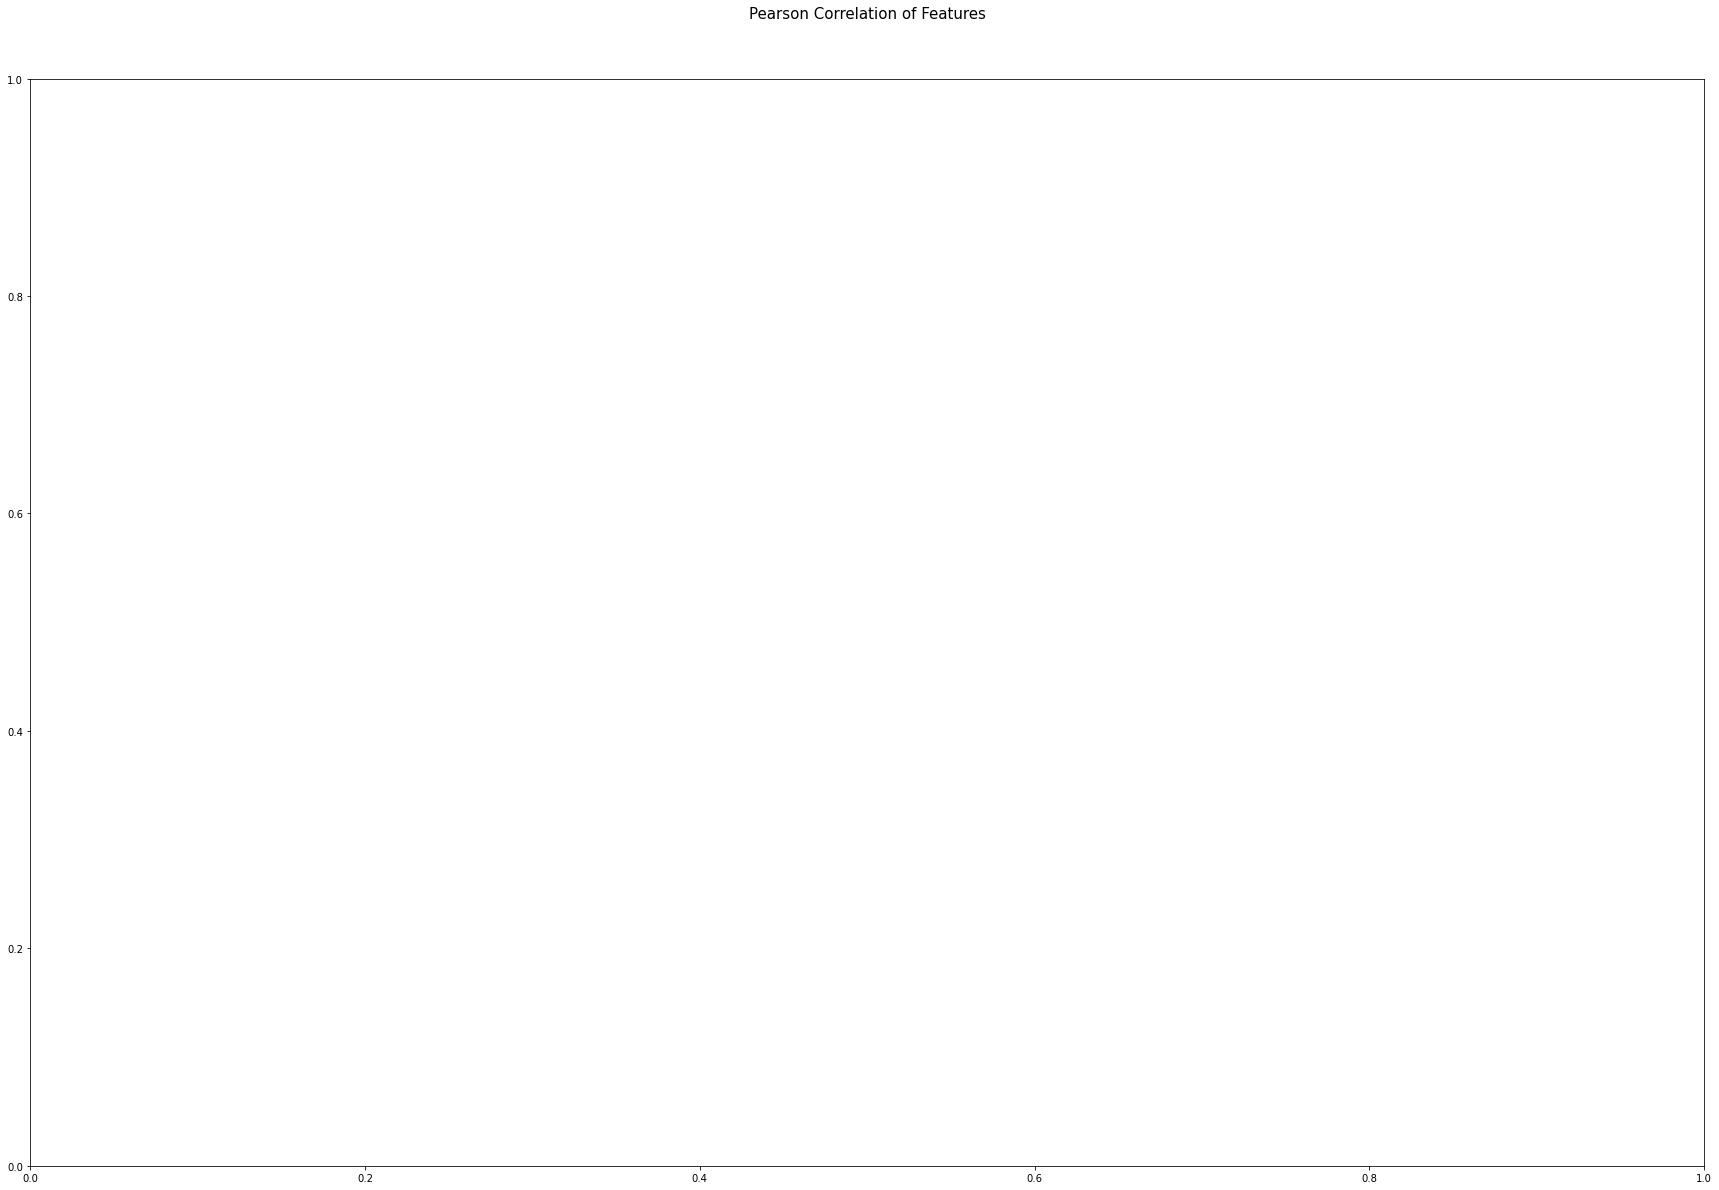

In [28]:
colormap = plt.cm.RdBu # 绘图库中的颜色查找表。比如A1是红色,A2是浅蓝色。 这样一种映射关系
plt.figure(figsize=(30,20))#创建一个新的图表，参数是尺寸，单位为英寸。
plt.title('Pearson Correlation of Features', y=1.05, size=15) #给图表一个标题~~ 
sns.heatmap(total_data.corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=False) #将皮尔森系数值画成图表形式。

In [29]:
corr = total_data.corr()
expire_flag = corr['flag'].sort_values(ascending=False)
expire_flag[((expire_flag > 0.1) | (expire_flag < -0.1))]

flag    1.000000
103     0.247533
50      0.180701
86      0.177215
155     0.158081
122     0.152069
192     0.149220
22      0.140547
8       0.139808
75      0.138253
6       0.134582
99      0.133246
140     0.133014
32      0.119331
123     0.115558
199     0.112056
9       0.111063
131     0.107662
105     0.104702
187     0.103041
167     0.101857
134    -0.100020
142    -0.108667
173    -0.111077
77     -0.111880
143    -0.112103
120    -0.112649
1      -0.119946
56     -0.120496
188    -0.122949
159    -0.130330
81     -0.132603
186    -0.135824
62     -0.142365
38     -0.157511
112    -0.175675
148    -0.176125
52     -0.181817
Name: flag, dtype: float64

In [56]:
corr_data = total_data[expire_flag[(expire_flag > 0.1) | (expire_flag < -0.1)].index]
corr_data.to_csv('E:/hxf_prediction/data_mimic/hxf/notes_extract/total_code/unstructure_data_and_corr_data_max.csv')

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [58]:
#file_name = 'E:/hxf prediction/data_mimic/hxf/notes_extract/total_code/unstructure_data_and_corr_data_and_flag.csv'
#total_data = pd.read_csv(file_name)

In [59]:
X, y = np.array(corr_data.drop(labels=['flag'], axis=1)), np.array([int(item) for item in corr_data['flag']])

In [60]:
X.shape

(5298, 37)

In [61]:
y.shape

(5298,)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666,test_size = 0.33 )

In [63]:
X_train_vec, X_train_need_scale = X_train[:, 0:200], X_train[:, 200:]
X_train_need_scale

array([], shape=(3549, 0), dtype=float64)

In [64]:
X_train_vec

array([[ 0.16466794, -0.04005161,  0.01978374, ..., -0.00687945,
        -0.07647737, -0.0164899 ],
       [ 0.17647565, -0.03639787,  0.02373132, ..., -0.00784952,
        -0.07917262, -0.02117403],
       [ 0.17146808, -0.04959239,  0.02366784, ..., -0.02212382,
        -0.08494422, -0.01284461],
       ...,
       [ 0.16981974, -0.04146113,  0.02306535, ..., -0.01156446,
        -0.07865839, -0.01489947],
       [ 0.16498244, -0.04143788,  0.01598799, ..., -0.00392614,
        -0.07760372, -0.01571417],
       [ 0.16931994, -0.04433632,  0.01669267, ..., -0.01147358,
        -0.07261827, -0.01637286]])

In [65]:
X_train_vec.shape

(3549, 37)

In [66]:
X_train_need_scale.shape

(3549, 0)

In [67]:
X_test_vec, X_test_need_scale = X_test[:, 0:200], X_test[:, 200:]
X_test_need_scale

array([], shape=(1749, 0), dtype=float64)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_need_scale)

ValueError: Found array with 0 feature(s) (shape=(3549, 0)) while a minimum of 1 is required by StandardScaler.

In [29]:
standard_scaler.mean_

array([1.92276773e+00, 2.96495837e+01, 1.48659144e+01, 2.94938530e+01,
       7.04806202e+01, 1.41410910e+01, 2.63313236e-01, 1.53306919e+00,
       1.36713178e+00, 3.60875969e+00, 5.07258111e-01, 1.08979529e+01,
       9.71043296e+01, 3.71498421e+00, 1.47809044e+01, 1.38102785e+00,
       3.07117428e+01, 1.32399265e+02, 7.39322194e+01, 4.51264387e+02,
       1.47621390e+01, 5.10340798e+00, 1.75101924e-01, 1.01479759e+00,
       6.46167097e-02, 1.26933026e+02, 1.08484065e-01, 5.61876543e+01,
       1.08646914e+01, 3.22682458e+01, 7.98115705e+01, 1.06151220e+01,
       5.80802756e+01, 2.40643239e+01, 3.61699110e+00, 8.53154177e+00,
       1.44193081e+01, 1.09052570e+01, 2.52899167e+01, 3.38227735e+01,
       1.29007034e+01, 3.20157910e+00, 1.49531036e+01])

In [30]:
X_train_standard = standard_scaler.transform(X_train_need_scale)
X_test_standard = standard_scaler.transform(X_test_need_scale)

In [31]:
X_train_standard = np.hstack((X_train_vec, X_train_standard))
X_test_standard = np.hstack((X_test_vec, X_test_standard))

In [32]:
print(X_train_standard.shape)
print(X_test_standard.shape)

(3483, 243)
(1716, 243)


In [33]:
X_train.shape

(3483, 243)

In [34]:
X_test.shape

(1716, 243)

In [35]:
lr = LogisticRegression(C=1000,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8304195804195804

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
def PolynomialLogisticRegression(degree=2, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('log_reg', LogisticRegression(C=C))
    ])

In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg_c = [0.001, 0.01, 0.1, 1]
param_grid = {
            'poly__degree': [i for i in range(3, 5)],   
            'log_reg__C': log_reg_c
        }

grid_search = GridSearchCV(PolynomialLogisticRegression(), param_grid)
grid_search.fit(X_train, y_train)

In [ ]:
log_reg_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {
            'C': log_reg_c
        }
grid_search = GridSearchCV(LogisticRegression(), param_grid)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

In [ ]:
grid_search.best_params_

In [ ]:
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
 
grid_search_2 = GridSearchCV(LogisticRegression(), tuned_parameters,cv=5)
grid_search_2.fit(X_train, y_train)

In [ ]:
grid_search_2.best_score_

In [ ]:
grid_search_2.best_params_

In [ ]:
grid_search_2.best_estimator_.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
param_grid = {
    'kernel': ('linear', 'rbf'),
    'C': np.arange(0.5, 1.5, 0.1)
}
grid_search_3 = GridSearchCV(SVC(), param_grid)
grid_search_3.fit(X_train, y_train)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = SVC()
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("SVM")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1193
           1       0.77      0.56      0.65       523

   micro avg       0.82      0.82      0.82      1716
   macro avg       0.80      0.75      0.76      1716
weighted avg       0.81      0.82      0.81      1716

AC 0.8164335664335665


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("AdaBoost")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AdaBoost
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1193
           1       0.77      0.56      0.65       523

   micro avg       0.82      0.82      0.82      1716
   macro avg       0.80      0.75      0.76      1716
weighted avg       0.81      0.82      0.81      1716

AC 0.8164335664335665


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("GBDT")
target_names = ['class 0', 'class 1']
print(classification_report(y_test,predictions,target_names=target_names))
print("AC",accuracy_score(y_test,predictions))

GBDT
              precision    recall  f1-score   support

     class 0       0.84      0.95      0.89      1193
     class 1       0.83      0.58      0.68       523

   micro avg       0.84      0.84      0.84      1716
   macro avg       0.83      0.76      0.79      1716
weighted avg       0.84      0.84      0.83      1716

AC 0.8356643356643356
